In [1]:
using InstantiateFromURL

# activate the QuantEcon environment
activate_github("QuantEcon/QuantEconLecturePackages", tag = "v0.9.5");

┌ Warning: On Windows, creating file symlinks requires Administrator privileges
└ @ Base.Filesystem file.jl:789


In [2]:
using LinearAlgebra, Statistics, Compat
using Distributions, StatPlots, QuadGK, Polynomials, Interpolations

┌ Info: Recompiling stale cache file C:\Users\lucasresck\.julia\compiled\v1.0\Distributions\xILW0.ji for Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file C:\Users\lucasresck\.julia\compiled\v1.0\StatPlots\iAmZm.ji for StatPlots [60ddc479-9b66-56df-82fc-76a74619b69c]
└ @ Base loading.jl:1190


In [3]:
function subtypetree(t, level=1, indent=4)
    if level == 1
        println(t)
    end
    for s in subtypes(t)
        println(join(fill(" ", level * indent)) * string(s))  # print type
        subtypetree(s, level+1, indent)  # recursively print the next type, indenting
    end
end

subtypetree (generic function with 3 methods)

In [4]:
subtypetree(AbstractArray)

AbstractArray
    AbstractInterpolation
        Interpolations.AbstractInterpolationWrapper{T,N,ITPT,IT} where IT<:Union{Tuple{Vararg{InterpolationType,N} where N}, InterpolationType} where ITPT where N where T
            AbstractExtrapolation{T,N,ITPT,IT} where IT<:Union{Tuple{Vararg{InterpolationType,N} where N}, InterpolationType} where ITPT where N where T
                Interpolations.Extrapolation{T,N,ITPT,IT,ET} where ET where IT<:Union{Tuple{Vararg{InterpolationType,N} where N}, InterpolationType} where ITPT where N where T
                Interpolations.FilledExtrapolation{T,N,ITP,IT,FT} where FT where IT<:Union{Tuple{Vararg{InterpolationType,N} where N}, InterpolationType} where ITP<:AbstractInterpolation where N where T
            ScaledInterpolation{T,N,ITPT,IT,RT} where RT where IT<:Union{Tuple{Vararg{InterpolationType,N} where N}, InterpolationType} where ITPT where N where T
        Interpolations.BSplineInterpolation
        Interpolations.GriddedInterpolation
      

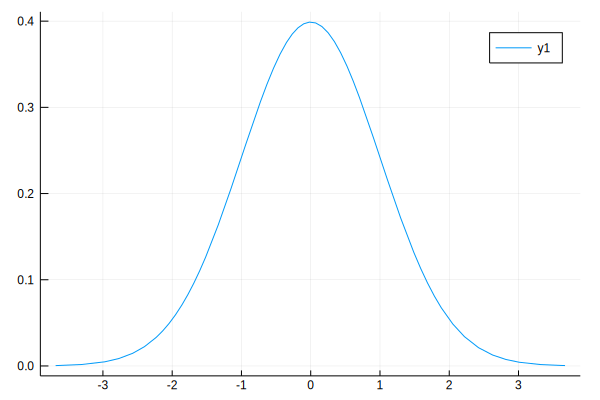

In [5]:
using Distributions

d = Normal(0.0, 1.0)
plot(d)

In [6]:
using Parameters

@with_kw struct IDoNotDoAnything <: Distribution{Univariate, Continuous}
    α::Float64
    β::Float64
    xMax::Float64 = 2.0
end
Distributions.Chi(d::IDoNotDoAnything) = print(d.α)
Distributions.Beta(d::IDoNotDoAnything) = print(d.β)
Distributions.pdf(d::IDoNotDoAnything, x) = d.α *exp(-d.α * x)/exp(-d.α * d.xMax)
Distributions.minimum(d::IDoNotDoAnything) = 0
Distributions.maximum(d::IDoNotDoAnything) = d.xMax

In [7]:
d = IDoNotDoAnything(α = 1.0, β = 2.0)
Beta(d)

2.0

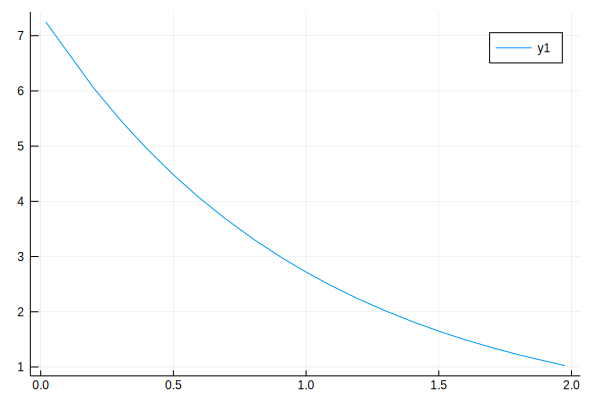

In [8]:
plot(d)

In [9]:
x = 4.0 + 1.0im
@which -(x,x)

-(z::Complex, w::Complex) in Base at complex.jl:267

In [10]:
struct ItsJustAType <: Distribution{Univariate, Continuous}
    a::Float64
end

Distributions.pdf(d::ItsJustAType, x) = print(x)

In [11]:
d = ItsJustAType(1.0)
@show pdf(d, 1.0)
@show pdf(IDoNotDoAnything(α = 1.0, β = 2.0), 10.0)

1.0pdf(d, 1.0) = nothing
pdf(IDoNotDoAnything(α=1.0, β=2.0), 10.0) = 0.0003354626279025118


0.0003354626279025118

In [12]:
d = ItsJustAType(198.0)

abs(d)

MethodError: MethodError: no method matching abs(::ItsJustAType)
Closest candidates are:
  abs(!Matched::Bool) at bool.jl:91
  abs(!Matched::Float16) at float.jl:517
  abs(!Matched::Float32) at float.jl:518
  ...

In [13]:
Base.abs(z::ItsJustAType)  = "$(abs(z.a))"

In [14]:
@show abs(-1.0)
@show abs(ItsJustAType(-1.0))

abs(-1.0) = 1.0
abs(ItsJustAType(-1.0)) = "1.0"


"1.0"

In [15]:
inv(3)

0.3333333333333333

In [16]:
a = 1.8 + 9im
b = 2.8 - 0im
@show typeof(a)
@show typeof(b)
@show isless(a, b)

typeof(a) = Complex{Float64}
typeof(b) = Complex{Float64}


MethodError: MethodError: no method matching isless(::Complex{Float64}, ::Complex{Float64})
Closest candidates are:
  isless(!Matched::Missing, ::Any) at missing.jl:66
  isless(!Matched::DataValues.DataValue{Union{}}, ::Any) at C:\Users\lucasresck\.julia\packages\DataValues\SNSrX\src\scalar\core.jl:262
  isless(!Matched::DataValues.DataValue{S}, ::T) where {S, T} at C:\Users\lucasresck\.julia\packages\DataValues\SNSrX\src\scalar\core.jl:256
  ...

In [17]:
Base.isless(a::Complex, b::Complex) = "Hey, it's not possible to calculate! Sorry :) Take this gently string"

In [18]:
@show isless(1, 2)
@show isless(a, b)

isless(1, 2) = true
isless(a, b) = "Hey, it's not possible to calculate! Sorry :) Take this gently string"


"Hey, it's not possible to calculate! Sorry :) Take this gently string"

In [19]:
using Pkg
Pkg.add("ProgressMeter")
using ProgressMeter

@showprogress 1 "Computing..." for i in 1:50
    sleep(0.1) # some computation....
end

  Updating registry at `C:\Users\lucasresck\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `C:\Users\lucasresck\Documents\PSR-internship\Notebooks\Learning\.projects\QuantEconLecturePackages-v0.9.5\Project.toml`
 [no changes]
  Updating `C:\Users\lucasresck\Documents\PSR-internship\Notebooks\Learning\.projects\QuantEconLecturePackages-v0.9.5\Manifest.toml`
 [no changes]


Computing...100%|███████████████████████████████████████| Time: 0:00:06


In [ ]:
@showprogress for i in 1:100000000
end

Progress:  98%|█████████████████████████████████████████|  ETA: 0:00:00